`# Import dependencies`

In [1]:
import datetime as dt 
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib

`# Specify date range for analysis`

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=1000)
start, end

(datetime.datetime(2021, 10, 23, 20, 14, 50, 962467),
 datetime.datetime(2024, 7, 19, 20, 14, 50, 962467))

`# Select stocks/tickers for analysis`

In [3]:
stocklist = ["NVDA", "GOOG", "META", "TSLA"]
stocklist

['NVDA', 'GOOG', 'META', 'TSLA']

In [4]:
yf.pdr_override()
df = pdr.get_data_yahoo(stocklist, start, end)
df.head()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                          Close  \
Ticker            GOOG        META       NVDA        TSLA        GOOG   
Date                                                                    
2021-10-25  138.615250  328.015961  23.128279  341.619995  138.772995   
2021-10-26  139.513245  315.162384  24.676748  339.476654  139.671997   
2021-10-27  146.261063  311.579712  24.411186  345.953339  146.427505   
2021-10-28  145.962906  316.270081  24.900387  359.013336  146.128998   
2021-10-29  148.101959  322.906433  25.525366  371.333344  148.270493   

Price                                                High              ...  \
Ticker            META       NVDA        TSLA        GOOG        META  ...   
Date                                                                   ...   
2021-10-25  328.690002  23.166000  341.619995  139.205795  329.559998  ...   
2021-10-26  315.809998  24.716999  339.476654  140.839493  330.209991  ...   
2021-10-27  312.220001  24.451000  345.953339  149.117996  319.250000  ...   
2021-10-28  316.920013  24.941000  359.013336  147.424500  325.519989  ...   
2021-10-29  323.570007  25.566999  371.333344  148.613007  326.000000  ...   

Price             Low                    Open                         \
Ticker           NVDA        TSLA        GOOG        META       NVDA   
Date                                                                   
2021-10-25  22.770000  314.733337  138.810501  320.299988  22.973000   
2021-10-26  23.924000  333.813324  140.606003  328.260010  23.989000   
2021-10-27  24.282000  343.593323  139.902496  314.190002  24.474001   
2021-10-28  24.523001  351.399994  147.298996  312.989990  24.878000   
2021-10-29  25.000000  357.736664  145.520004  320.190002  25.000999   

Price                     Volume                                  
Ticker            TSLA      GOOG      META       NVDA       TSLA  
Date                                                              
2021-10-25  316.843323  21082000  38409000  230235000  188556300  
2021-10-26  341.563324  28258000  65654000  485898000  187245000  
2021-10-27  346.553345  51850000  29971800  245990000  115579500  
2021-10-28  356.103333  32418000  50806800  234204000   81639600  
2021-10-29  360.619995  28954000  37059400  292503000   89755200  

[5 rows x 24 columns]

`# Understanding the pandas dataframe structure`

In [5]:
df.index

DatetimeIndex(['2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05',
               ...
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19'],
              dtype='datetime64[ns]', name='Date', length=687, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'GOOG'),
            (   'Volume', 'META'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

`# Access useful prices easily`

In [7]:
Close = df.Close
Close.head()

Ticker,GOOG,META,NVDA,TSLA
Date,,,,
2021-10-25,138.772995,328.690002,23.166000,341.619995
2021-10-26,139.671997,315.809998,24.716999,339.476654
2021-10-27,146.427505,312.220001,24.451000,345.953339
2021-10-28,146.128998,316.920013,24.941000,359.013336
2021-10-29,148.270493,323.570007,25.566999,371.333344


`# Get insights quickly with pandas describe method`

In [8]:
Close[Close.index > end - dt.timedelta(days=80)].describe(percentiles=[0.1,0.5,0.9])

Ticker,GOOG,META,NVDA,TSLA
count,55.000000,55.000000,55.000000,55.000000
mean,178.861455,488.624909,113.604582,196.605636
std,6.423941,22.720460,15.953729,30.762707
min,165.570007,439.190002,83.041000,168.470001
10%,171.003998,465.719995,90.404202,173.869998
50%,178.020004,489.790009,120.888000,180.110001
90%,187.354001,512.952002,130.312000,250.604001
max,192.660004,539.909973,135.580002,263.260010


`# Plotting with matplotlib vs plotly`

<Axes: xlabel='Date'>

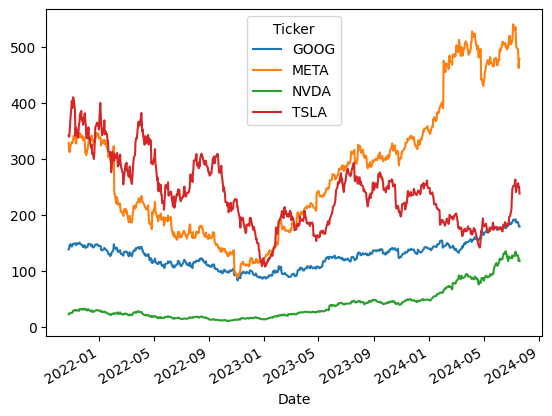

In [9]:
Close.plot()

In [10]:
import plotly.io as pio
pio.renderers.default = 'iframe'
pd.options.plotting.backend = "plotly"

In [11]:
Close.plot()

In [28]:
Close['NVDA'].pct_change().dropna().plot(kind='hist')